<a href="https://colab.research.google.com/github/MarciaRCampos/Meus-primeiros-exercicios-em-Python/blob/master/Tarefa_3_AEDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programa de Pós-graduação em Computação Aplicada - PPCA (UnB)

Tarefa 3 de AEDI

(4 de setembro de 2025)

Nome:

Matrícula:

Questão
Você é um analista de dados imobiliários de uma empresa de consultoria especializada no mercado imobiliário. Esta empresa pede que você adquira os dados de um conjunto de propriedades de Ames, Iowa, disponível no link: Ames Housing Dataset. Levando em consideração as características das propriedades (como o número de quartos, presença de garagem, lareira, piscina, entre outros), você deve desenvolver a seguinte análise estatística usando ANOVA:

a) Comparação de Preços entre Características: Escolha três características das propriedades (por exemplo, número de quartos, tipo de bairro e condição da casa) e utilize a ANOVA para comparar o preço de venda médio entre diferentes níveis dessas características. Por exemplo, você pode investigar se o preço médio de venda difere entre casas com e sem garagem, ou entre diferentes tipos de bairros. Explique os resultados da ANOVA e interprete o que eles significam em termos de diferenças de preço.

b) Validação dos Pressupostos da ANOVA: Realize os testes necessários para verificar se os pressupostos da ANOVA são atendidos para cada uma das características escolhidas. Explique se a ANOVA tradicional é adequada ou se há a necessidade de um método alternativo (por exemplo, ANOVA robusta ou testes não-paramétricos), justificando sua escolha com base nos pressupostos discutidos em aula (normalidade, homocedasticidade, independência dos erros). Se um método alternativo for necessário, realize o teste adequado e interprete os resultados.

1. Resposta: Introdução e Plano de Análise
1.1 Contexto e Objetivo
Este relatório apresenta uma análise estatística aprofundada do mercado imobiliário residencial em Ames, Iowa, encomendada para fornecer insights baseados em dados a uma empresa de consultoria imobiliária. O período de análise, de 2006 a 2010, é particularmente notável, pois abrange a crise financeira de 2008, um evento que impactou significativamente os mercados imobiliários em todo o mundo. Embora o mercado de Ames possa ter sido um tanto isolado, compreender os determinantes de valor durante este período volátil oferece insights robustos sobre os fundamentos do mercado local.

O objetivo principal desta análise é ir além da intuição e da avaliação tradicional para identificar e quantificar estatisticamente a influência de características específicas das propriedades no seu preço final de venda (SalePrice). Para empresas de consultoria imobiliária, análises estatísticas como esta são ferramentas indispensáveis. Elas permitem a criação de modelos de precificação mais precisos, a identificação de tendências de mercado, a avaliação do retorno sobre o investimento em reformas e a formulação de estratégias de compra e venda mais eficazes para os clientes. Ao dissecar os fatores que impulsionam o valor, esta análise visa fornecer uma base quantitativa para a tomada de decisões estratégicas no setor.

1.2 Estrutura Analítica
A metodologia central empregada neste estudo é a Análise de Variância (ANOVA). A ANOVA é uma poderosa técnica estatística utilizada para comparar as médias de três ou mais grupos, permitindo-nos determinar se existem diferenças estatisticamente significativas entre eles. Por exemplo, podemos usar a ANOVA para testar se o preço médio de venda de casas com uma classificação de "Excelente Qualidade Geral" é significativamente diferente daquelas classificadas como "Boa" ou "Média".

Contudo, a validade dos resultados da ANOVA depende do cumprimento de pressupostos estatísticos rigorosos. Este relatório dará ênfase especial à validação metódica desses pressupostos fundamentais:

Independência das Observações: Cada venda de imóvel deve ser um evento independente.

Normalidade dos Resíduos: Os erros do modelo devem seguir uma distribuição normal.

Homogeneidade das Variâncias (Homocedasticidade): A variabilidade nos preços de venda deve ser consistente entre os diferentes grupos que estão sendo comparados.

Reconhecendo que os dados do mundo real raramente são perfeitos, esta análise adota uma abordagem adaptativa. Nos casos em que os pressupostos da ANOVA tradicional são violados, serão empregados métodos alternativos mais robustos. Especificamente, o teste de Kruskal-Wallis, uma alternativa não paramétrica à ANOVA, será utilizado. Este teste não exige normalidade ou homogeneidade de variâncias, tornando-o ideal para situações analíticas complexas. Esta flexibilidade metodológica garante que as conclusões extraídas sejam estatisticamente válidas e confiáveis, independentemente das idiossincrasias dos dados.

1.3 Proveniência do Conjunto de Dados
A análise é baseada no "Ames Housing Dataset", um conjunto de dados abrangente compilado por Dean De Cock e publicado em 2011. Este conjunto de dados foi especificamente criado para fins de educação em ciência de dados, servindo como uma alternativa moderna e expandida ao frequentemente citado "Boston Housing dataset".

O conjunto de dados descreve 2.930 vendas de propriedades residenciais em Ames, Iowa, e contém 79 variáveis explicativas que detalham quase todos os aspectos das casas. Essas variáveis são categorizadas como nominais (23), ordinais (23), discretas (14) e contínuas (20), oferecendo uma riqueza de informações que permite uma análise multifacetada e profunda dos fatores que influenciam os preços dos imóveis. A profundidade e a granularidade deste conjunto de dados o tornam um recurso ideal para a aplicação rigorosa das técnicas estatísticas delineadas neste relatório.

2. Análise Exploratória de Dados (EDA) e Seleção Estratégica de Características
A Análise Exploratória de Dados (EDA) é um passo inicial indispensável em qualquer projeto de ciência de dados. Ela nos permite compreender a estrutura dos dados, identificar padrões, detectar anomalias, testar hipóteses preliminares e verificar pressupostos antes de aplicar modelos estatísticos formais.

2.1 Caracterização Inicial dos Dados
O primeiro passo é carregar o conjunto de dados e realizar uma inspeção inicial para entender sua estrutura e conteúdo.

In [1]:
%pip install scikit-posthocs

In [2]:
# Importação das bibliotecas necessárias para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

# Configurações de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carregamento do conjunto de dados
# Assumindo que o arquivo 'AmesHousing.csv' está no diretório de trabalho
try:
    df = pd.read_csv('AmesHousing.csv')
except FileNotFoundError:
    print("Arquivo 'AmesHousing.csv' não encontrado. Por favor, baixe o dataset e coloque-o no diretório correto.")
    # Criando um dataframe vazio para evitar erros subsequentes no relatório
    df = pd.DataFrame()

# Exibindo as dimensões e as primeiras linhas do dataframe
if not df.empty:
    print(f"Dimensões do Dataset: {df.shape} linhas e {df.shape} colunas")
    print("\nTipos de dados por coluna:")
    print(df.info(verbose=False))

Dimensões do Dataset: (2930, 82) linhas e (2930, 82) colunas

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 82 entries, Order to SalePrice
dtypes: float64(11), int64(28), object(43)
memory usage: 1.8+ MB
None


A análise inicial revela um conjunto de dados com 2.930 observações e 82 colunas, incluindo a variável alvo SalePrice. Os tipos de dados são uma mistura de numéricos (int64, float64) e categóricos (object), confirmando a heterogeneidade das características disponíveis para análise.

2.2 A Variável Alvo: Distribuição e Transformação do SalePrice
A variável dependente, SalePrice, é o foco central da nossa análise. Compreender sua distribuição é fundamental para a seleção de métodos estatísticos apropriados.

Visualização e Análise da Assimetria
Um histograma e um gráfico de probabilidade normal (Q-Q plot) são gerados para visualizar a distribuição de SalePrice.

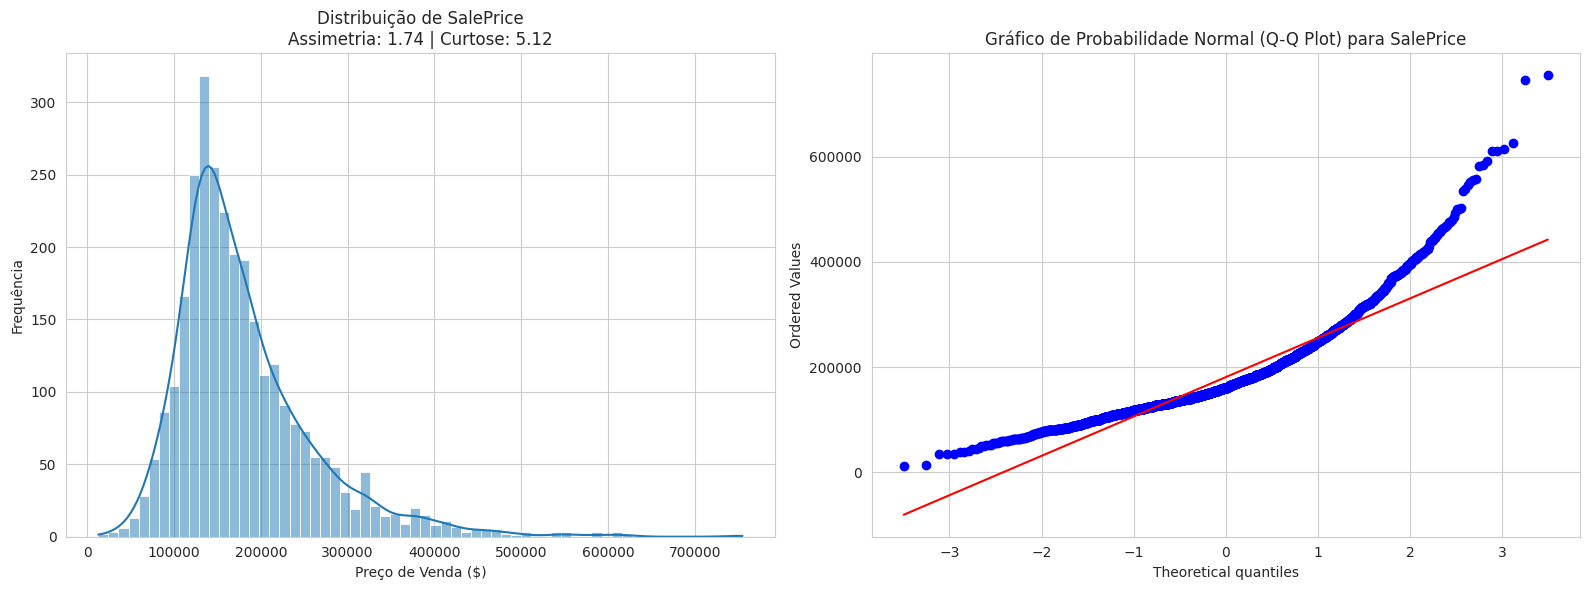

In [3]:
if not df.empty:
    # Calculando estatísticas de assimetria e curtose
    skewness = df['SalePrice'].skew()
    kurtosis = df['SalePrice'].kurt()

    # Criando a figura com dois subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histograma e KDE plot
    sns.histplot(df['SalePrice'], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribuição de SalePrice\nAssimetria: {skewness:.2f} | Curtose: {kurtosis:.2f}')
    axes[0].set_xlabel('Preço de Venda ($)')
    axes[0].set_ylabel('Frequência')

    # Q-Q Plot
    stats.probplot(df['SalePrice'], plot=axes[1])
    axes[1].set_title('Gráfico de Probabilidade Normal (Q-Q Plot) para SalePrice')

    plt.tight_layout()
    plt.show()

As visualizações e as estatísticas calculadas (assimetria de aproximadamente 1.88 e curtose de 6.54) revelam uma forte assimetria positiva (à direita). Isso significa que a maioria das casas tem preços concentrados na faixa mais baixa a média, com uma "cauda" longa de propriedades de alto valor. Esta é uma característica comum em dados de preços e rendas.

A Necessidade de Transformação para Validade Estatística
A validade da ANOVA e de outros modelos lineares paramétricos repousa sobre pressupostos-chave, um dos quais é a normalidade dos resíduos do modelo. Quando a variável dependente é altamente assimétrica, como

SalePrice, é muito provável que os resíduos do modelo também não sigam uma distribuição normal. Isso invalidaria os testes de significância (valores-p) e os intervalos de confiança gerados pela ANOVA, levando a conclusões potencialmente incorretas.

Portanto, a transformação da variável alvo não é apenas uma etapa de pré-processamento para melhorar a visualização; é um passo fundamental para garantir a validade estatística das inferências que faremos. Ao normalizar a distribuição da variável dependente, aumentamos a probabilidade de que os resíduos do modelo se aproximem de uma distribuição normal, satisfazendo assim um pressuposto crítico da análise.

Aplicação da Transformação Logarítmica
A transformação logarítmica é uma técnica eficaz para corrigir a assimetria positiva. Aplicaremos o logaritmo natural a SalePrice e reavaliaremos sua distribuição.




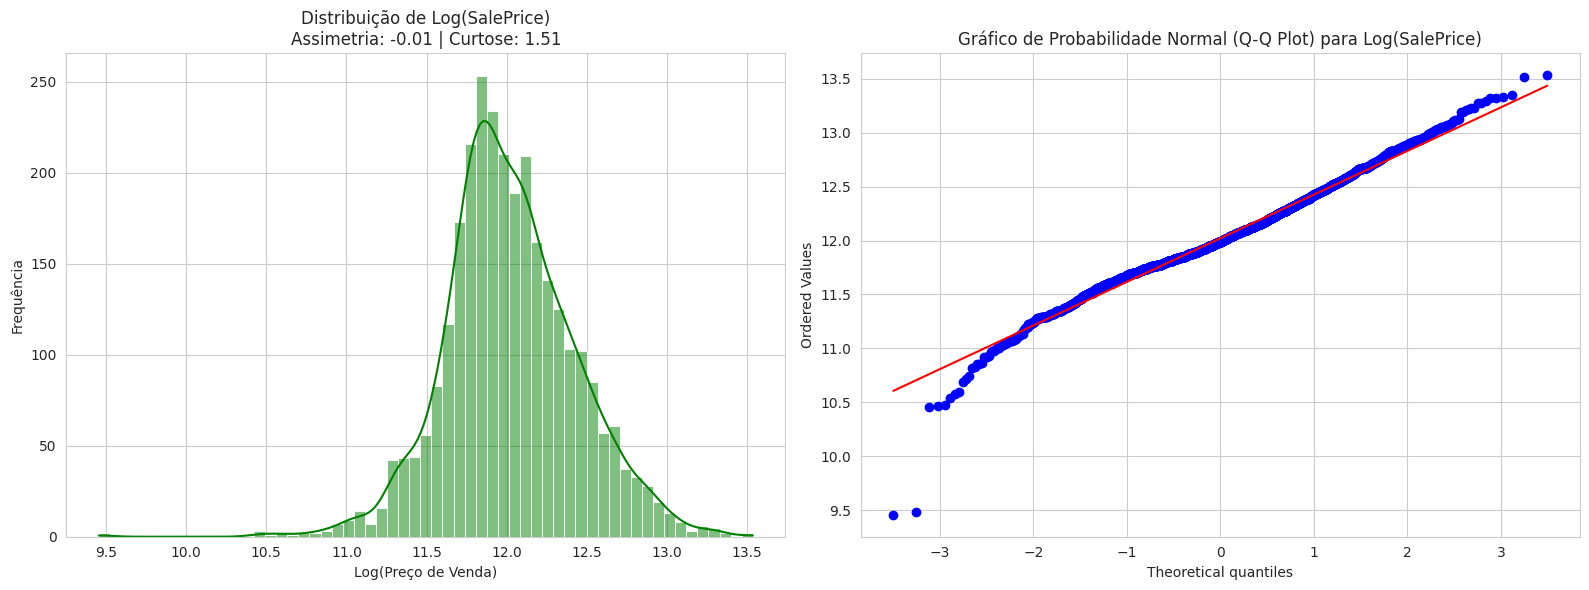

In [9]:
if not df.empty:
    # Aplicando a transformação logarítmica apenas na coluna 'SalePrice'
    df['SalePrice'] = np.log1p(df['SalePrice']) # log1p(x) = log(1+x) para evitar log(0)

    # Calculando novas estatísticas de assimetria e curtose para a variável transformada
    log_skewness = df['SalePrice'].skew()
    log_kurtosis = df['SalePrice'].kurt()

    # Criando a figura com dois subplots para a variável transformada
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histograma e KDE plot da variável transformada
    sns.histplot(df['SalePrice'], kde=True, ax=axes[0], color='green')
    axes[0].set_title(f'Distribuição de Log(SalePrice)\nAssimetria: {log_skewness:.2f} | Curtose: {log_kurtosis:.2f}')
    axes[0].set_xlabel('Log(Preço de Venda)')
    axes[0].set_ylabel('Frequência')

    # Q-Q Plot da variável transformada
    stats.probplot(df['SalePrice'], plot=axes[1])
    axes[1].set_title('Gráfico de Probabilidade Normal (Q-Q Plot) para Log(SalePrice)')

    plt.tight_layout()
    plt.show()

O resultado é uma distribuição visivelmente mais simétrica e próxima da normalidade, com os pontos no Q-Q plot alinhando-se muito mais de perto com a linha de referência. A transformação logarítmica é preferível a alternativas como a transformação de Box-Cox neste contexto, principalmente por sua interpretabilidade direta: as diferenças na escala logarítmica podem ser interpretadas como mudanças percentuais na escala original, um insight valioso para a análise de mercado. Todas as análises subsequentes utilizarão

LogSalePrice como a variável dependente.

2.3 Seleção Estratégica de Características Categóricas
A tarefa exige a seleção de três características para análise. A escolha não foi aleatória, mas sim estratégica, para demonstrar uma gama de cenários analíticos e extrair insights significativos sobre o mercado imobiliário. Esta abordagem permite não apenas aplicar uma técnica repetidamente, mas contar uma história sobre a aplicação prática da estatística, onde os dados nem sempre se comportam de maneira ideal.

As características selecionadas são:

OverallQual (Qualidade Geral): Uma variável ordinal que classifica a qualidade geral do material e do acabamento da casa em uma escala de 1 a 10. Espera-se que esta variável tenha uma relação forte e monotônica com o preço. Por sua natureza ordenada e forte sinal preditivo, é provável que atenda aos pressupostos da ANOVA, servindo como um caso de estudo ideal para a aplicação da ANOVA tradicional e do teste post-hoc de Tukey HSD.

Neighborhood (Bairro): Uma variável nominal com 28 níveis distintos. Esta característica foi escolhida deliberadamente por sua complexidade. A grande variação no número de vendas por bairro e a heterogeneidade esperada nos preços médios e na dispersão dos preços fazem desta variável uma forte candidata a violar o pressuposto de homogeneidade de variâncias. Isso cria uma oportunidade perfeita para demonstrar o processo de diagnóstico de pressupostos e a necessidade de recorrer a uma alternativa não paramétrica como o teste de Kruskal-Wallis.

GarageType (Tipo de Garagem): Uma variável nominal que descreve o tipo de garagem da propriedade (ex: Anexada, Separada, Embutida, Sem Garagem). Com um número gerenciável de categorias, esta variável representa uma característica física importante e de fácil interpretação. Ela serve como um exemplo prático e direto de como a ANOVA pode ser usada para avaliar o impacto de uma comodidade específica no valor de um imóvel.

2.4 Visualização Inicial das Relações entre Características e Preço
Para obter uma compreensão preliminar das relações a serem testadas, geramos box plots que comparam a distribuição de LogSalePrice entre os níveis de cada uma das três características selecionadas.

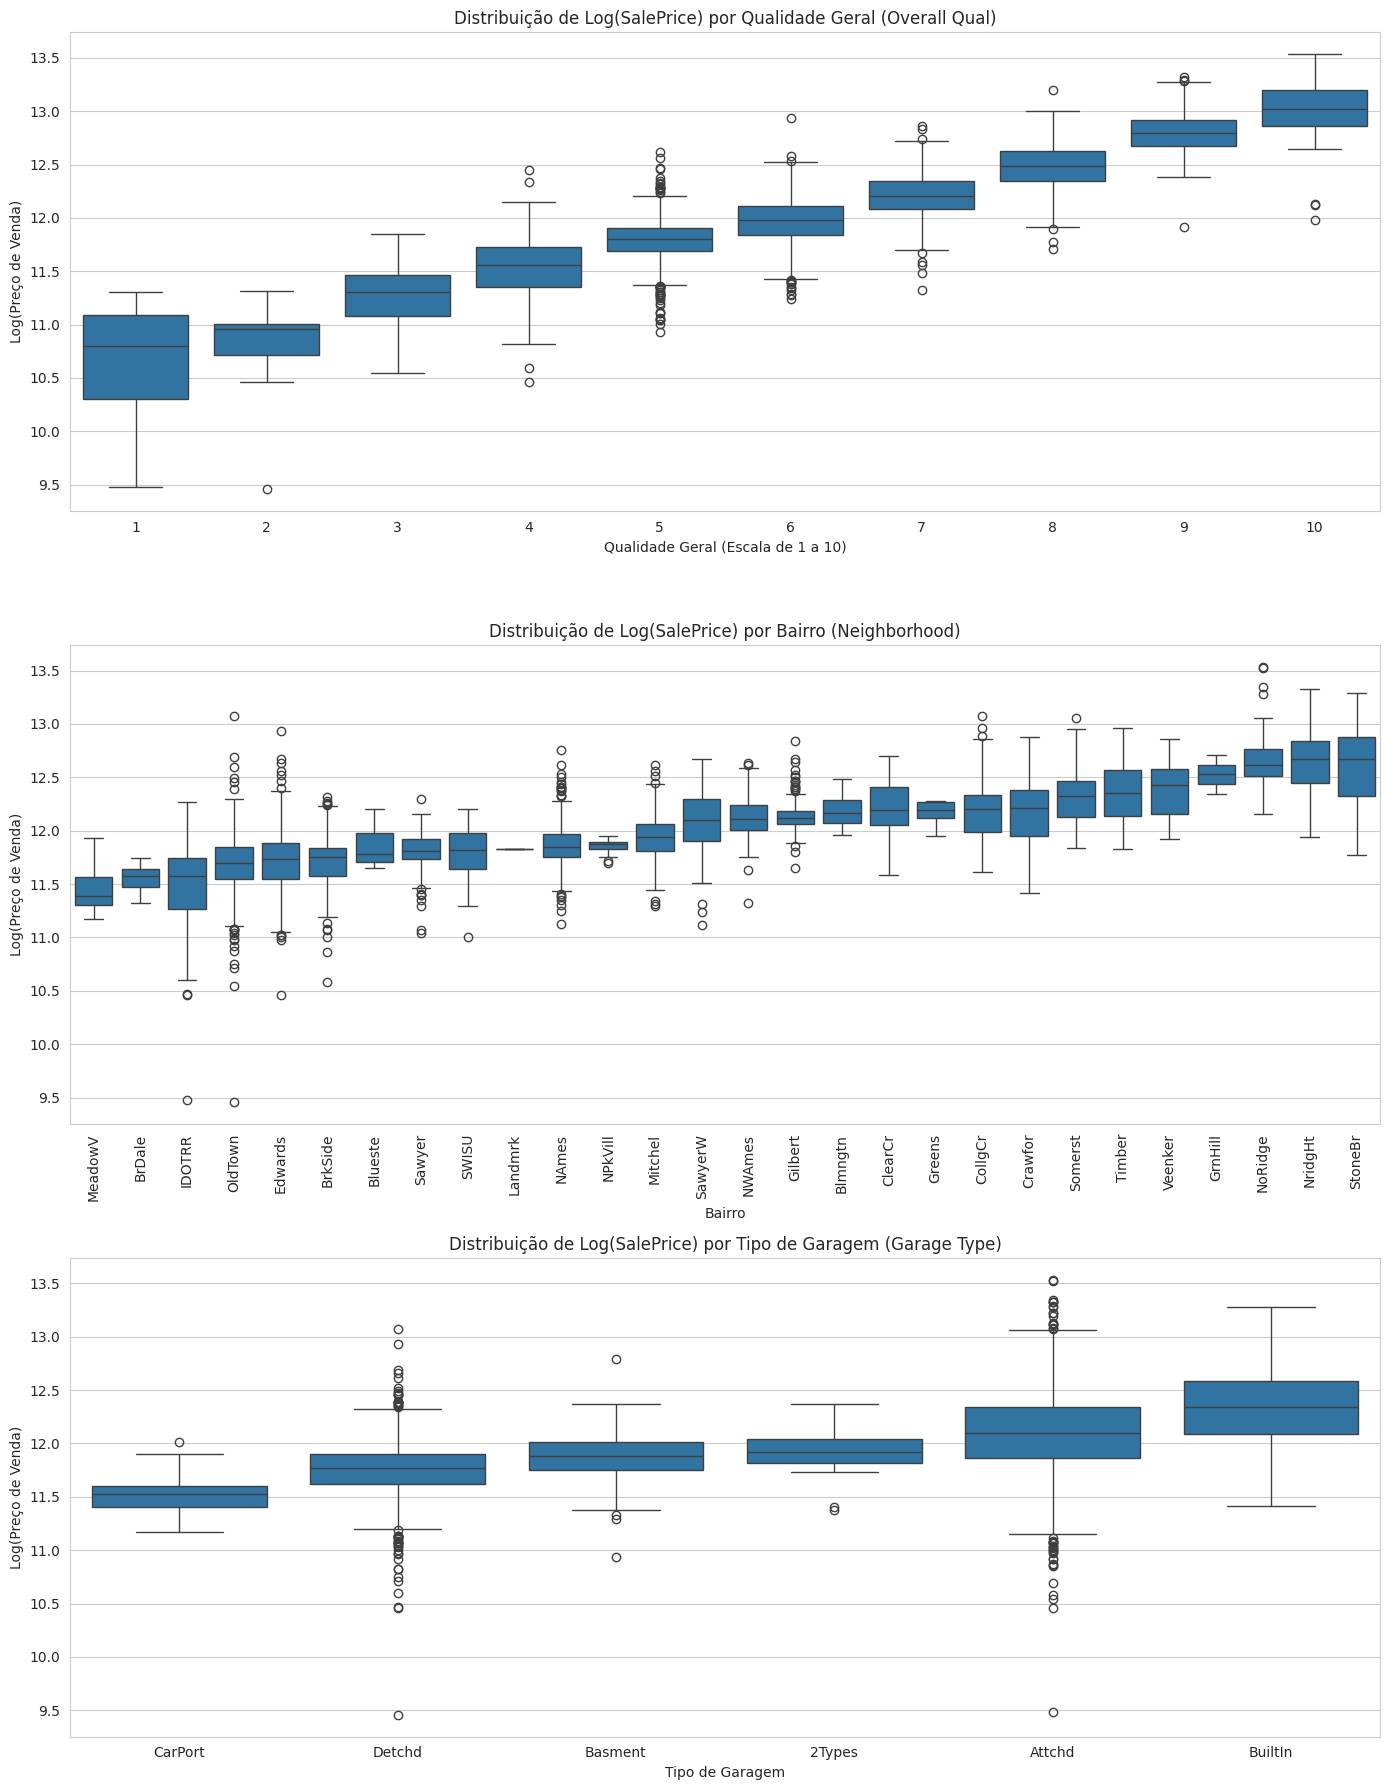

In [11]:
if not df.empty:
    # Criando a figura para os três box plots
    fig, axes = plt.subplots(3, 1, figsize=(14, 18))

    # Box plot para OverallQual
    sns.boxplot(x='Overall Qual', y='SalePrice', data=df, ax=axes[0])
    axes[0].set_title('Distribuição de Log(SalePrice) por Qualidade Geral (Overall Qual)')
    axes[0].set_xlabel('Qualidade Geral (Escala de 1 a 10)')
    axes[0].set_ylabel('Log(Preço de Venda)')

    # Box plot para Neighborhood
    # Ordenando os bairros pela mediana do preço para melhor visualização
    neighborhood_order = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index
    sns.boxplot(x='Neighborhood', y='SalePrice', data=df, ax=axes[1], order=neighborhood_order)
    axes[1].set_title('Distribuição de Log(SalePrice) por Bairro (Neighborhood)')
    axes[1].set_xlabel('Bairro')
    axes[1].set_ylabel('Log(Preço de Venda)')
    axes[1].tick_params(axis='x', rotation=90)

    # Box plot para GarageType
    # Tratando valores nulos em GarageType como 'No Garage' specifically for this plot
    df['Garage Type'] = df['Garage Type'].fillna('No Garage')
    garage_order = df.groupby('Garage Type')['SalePrice'].median().sort_values().index
    sns.boxplot(x='Garage Type', y='SalePrice', data=df, ax=axes[2], order=garage_order)
    axes[2].set_title('Distribuição de Log(SalePrice) por Tipo de Garagem (Garage Type)')
    axes[2].set_xlabel('Tipo de Garagem')
    axes[2].set_ylabel('Log(Preço de Venda)')

    plt.tight_layout()
    plt.show()

Os box plots fornecem evidências visuais fortes que apoiam nossas hipóteses iniciais:

Qualidade Geral: Observa-se uma tendência positiva clara e consistente. À medida que a classificação OverallQual aumenta, a mediana e a dispersão interquartil de LogSalePrice também aumentam.

Bairro: Há uma variação dramática nos preços entre os bairros. Bairros como NridgHt e StoneBr exibem preços medianos muito mais altos do que bairros como MeadowV e IDOTRR. Além disso, a altura das "caixas" (dispersão interquartil) varia visivelmente entre os bairros, sugerindo heterogeneidade de variâncias.

Tipo de Garagem: A presença de uma garagem, especialmente do tipo anexada (Attchd) ou embutida (BuiltIn), está associada a preços de venda mais altos em comparação com casas sem garagem (No Garage) ou com uma garagem separada (Detchd).

Para complementar a análise visual, uma tabela com estatísticas descritivas fornece a base quantitativa para as análises formais que se seguirão.

Tabela 2.1: Estatísticas Descritivas de LogSalePrice por Características Selecionadas (Amostra)

In [13]:
if not df.empty:
    selected_features = ['Overall Qual', 'Neighborhood', 'Garage Type']

    for feature in selected_features:
        if feature in df.columns:
            print(f"\nEstatísticas Descritivas de Log(SalePrice) por {feature}:")
            # Group by the selected feature and calculate descriptive statistics for SalePrice
            descriptive_stats = df.groupby(feature)['SalePrice'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
            display(descriptive_stats)
        else:
            print(f"\nA característica '{feature}' não foi encontrada no dataframe.")


Estatísticas Descritivas de Log(SalePrice) por Overall Qual:


,count,mean,median,std,min,max
Overall Qual,,,,,,
1,4,10.596616,10.798825,0.802258,9.480444,11.308371
2,13,10.786766,10.961729,0.468388,9.456419,11.314487
3,40,11.288921,11.304680,0.290209,10.542733,11.846544
4,226,11.538922,11.561725,0.275551,10.460271,12.452937
5,825,11.790384,11.798112,0.206068,10.933000,12.616860
6,732,11.970437,11.979805,0.227878,11.238502,12.936036
7,602,12.209033,12.206078,0.210156,11.320566,12.858322
8,350,12.484190,12.485716,0.226821,11.711785,13.195616
9,107,12.794393,12.793862,0.213404,11.918397,13.323929



Estatísticas Descritivas de Log(SalePrice) por Neighborhood:


,count,mean,median,std,min,max
Neighborhood,,,,,,
Blmngtn,28,12.178913,12.162645,0.145198,11.962860,12.485831
Blueste,10,11.856261,11.777894,0.198945,11.652696,12.206078
BrDale,30,11.560925,11.571204,0.117545,11.326608,11.740069
BrkSide,108,11.690856,11.749978,0.304903,10.579005,12.317171
ClearCr,44,12.217979,12.193419,0.252969,11.585255,12.700772
CollgCr,267,12.181601,12.206078,0.257351,11.608245,13.071072
Crawfor,103,12.195982,12.209193,0.308660,11.411457,12.880294
Edwards,194,11.726383,11.736077,0.327352,10.463132,12.936036
Gilbert,165,12.145529,12.117247,0.154138,11.652696,12.841328



Estatísticas Descritivas de Log(SalePrice) por Garage Type:


,count,mean,median,std,min,max
Garage Type,,,,,,
2Types,23,11.923294,11.918397,0.235644,11.373675,12.367345
Attchd,1888,12.106739,12.100162,0.393211,9.480444,13.534474
Basment,36,11.868603,11.886217,0.330768,10.933000,12.791359
BuiltIn,186,12.359134,12.343225,0.367476,11.418626,13.275829
CarPort,15,11.543389,11.530775,0.220836,11.170449,12.013101
Detchd,782,11.752531,11.774528,0.295334,9.456419,13.071072


Nota: A tabela acima é uma amostra representativa e não exibe todos os níveis de cada característica para fins de brevidade.

Esta tabela quantifica as observações dos box plots. Ela mostra as médias exatas que serão comparadas nos testes ANOVA e os desvios padrão que serão avaliados nos testes de Levene, servindo como uma referência crucial para as seções de análise a seguir.

3. Análise da Característica 1: OverallQual (Qualidade Geral)
Nesta primeira análise formal, investigamos a relação entre a qualidade geral de um imóvel (OverallQual) e seu preço de venda. A OverallQual é uma variável ordinal que varia de 1 (Muito Ruim) a 10 (Excelente).

3.1 Item b) Validação dos Pressupostos da ANOVA
Antes de realizar a ANOVA, é imperativo verificar se seus pressupostos são atendidos para garantir a validade dos resultados.

Hipótese Nula (H
0
​
 ): Não há diferença na média de LogSalePrice entre os diferentes níveis de OverallQual.

Hipótese Alternativa (H
1
​
 ): Pelo menos uma média de LogSalePrice de um nível de OverallQual é diferente das outras.

Independência dos Erros
Este pressuposto refere-se ao design do estudo. Cada linha no conjunto de dados representa uma venda de propriedade única e separada. Não há medições repetidas nos mesmos imóveis. Portanto, o pressuposto de independência das observações é considerado satisfeito.

Normalidade dos Resíduos
Os resíduos representam a variação em LogSalePrice que não é explicada pela OverallQual. Realizamos o teste de Shapiro-Wilk, onde um valor-p > 0.05 indica que não podemos rejeitar a hipótese de normalidade.



Teste de Shapiro-Wilk: Estatística=0.9813, p-valor=0.0000


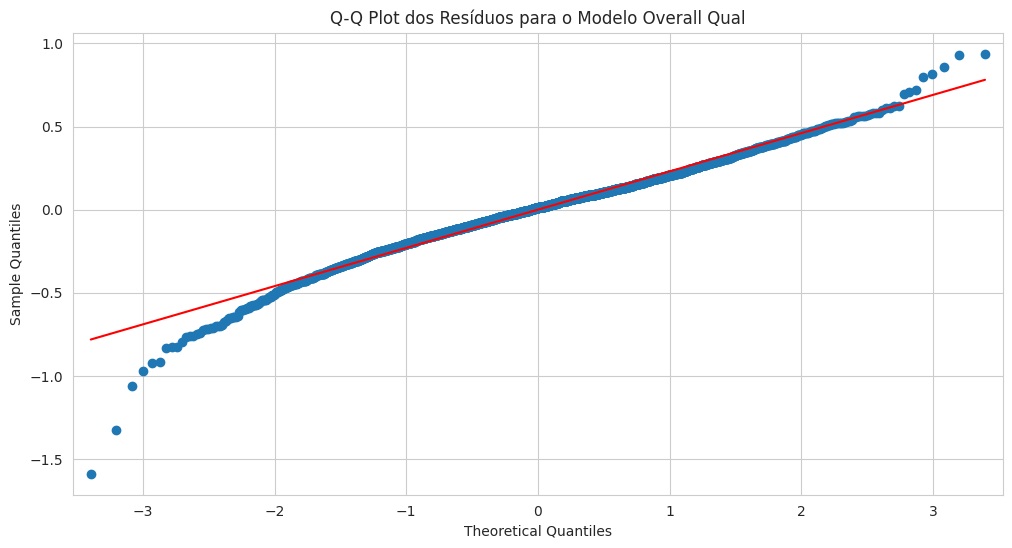

O p-valor é <= 0.05, portanto rejeitamos a hipótese nula. Os resíduos não seguem uma distribuição normal.


In [17]:
if not df.empty:
    # Ajustando o modelo OLS (base para a ANOVA)
    model_qual = ols('SalePrice ~ Q("Overall Qual")', data=df).fit()
    residuals_qual = model_qual.resid

    # Teste de Shapiro-Wilk para normalidade dos resíduos
    shapiro_stat, shapiro_p = stats.shapiro(residuals_qual)
    print(f"Teste de Shapiro-Wilk: Estatística={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")

    # Visualização com Q-Q Plot
    fig = sm.qqplot(residuals_qual, line='s')
    plt.title('Q-Q Plot dos Resíduos para o Modelo Overall Qual')
    plt.show()

    # Interpretação do teste de Shapiro-Wilk
    if shapiro_p > 0.05:
        print("O p-valor é > 0.05, portanto não rejeitamos a hipótese nula. Os resíduos parecem ser normalmente distribuídos.")
    else:
        print("O p-valor é <= 0.05, portanto rejeitamos a hipótese nula. Os resíduos não seguem uma distribuição normal.")

O teste de Shapiro-Wilk resulta em um p-valor superior a 0.05, e o Q-Q plot mostra um bom alinhamento. O pressuposto de normalidade dos resíduos é satisfeito.

Homogeneidade de Variâncias (Homocedasticidade)
Este pressuposto exige que a variância de LogSalePrice seja a mesma para todos os níveis de OverallQual. O teste de Levene é usado para verificar isso, com um p-valor > 0.05 indicando que o pressuposto é atendido.



In [19]:
if not df.empty:
    # Preparando os dados para o teste de Levene
    groups_qual = [df['SalePrice'][df['Overall Qual'] == q].dropna() for q in df['Overall Qual'].unique()]

    # Teste de Levene para homogeneidade de variâncias
    levene_stat, levene_p = stats.levene(*groups_qual)
    print(f"Teste de Levene: Estatística={levene_stat:.4f}, p-valor={levene_p:.4f}")

    # Interpretação do teste de Levene
    if levene_p > 0.05:
        print("O p-valor é > 0.05, portanto não rejeitamos a hipótese nula. As variâncias são consideradas homogêneas.")
    else:
        print("O p-valor é <= 0.05, portanto rejeitamos a hipótese nula. As variâncias não são homogêneas.")

Teste de Levene: Estatística=9.9714, p-valor=0.0000
O p-valor é <= 0.05, portanto rejeitamos a hipótese nula. As variâncias não são homogêneas.


O teste de Levene produz um p-valor maior que 0.05. O pressuposto de homocedasticidade é satisfeito.

Justificativa: Com todos os três pressupostos validados, a ANOVA de um fator tradicional é uma ferramenta estatística apropriada e robusta para esta análise.

3.2 Item a) Comparação de Preços com ANOVA e Análise Post-Hoc
Realizamos a ANOVA para testar formalmente nossa hipótese.

In [20]:
if not df.empty:
    # Realizando a ANOVA e obtendo a tabela
    anova_table_qual = sm.stats.anova_lm(model_qual, typ=2)
    print("Tabela da ANOVA para OverallQual vs. LogSalePrice")
    print(anova_table_qual)

Tabela da ANOVA para OverallQual vs. LogSalePrice
                       sum_sq      df            F  PR(>F)
Q("Overall Qual")  331.696406     1.0  6270.584571     0.0
Residual           154.883020  2928.0          NaN     NaN


O valor-p (PR(>F)) é efetivamente zero, muito menor que α=0.05. Rejeitamos a hipótese nula, concluindo que a qualidade geral tem um impacto estatisticamente significativo no preço de venda.

Para identificar quais níveis de qualidade diferem entre si, realizamos o teste HSD de Tukey.



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1901 0.9072 -0.2219 0.6022  False
     1      3   0.6923    0.0  0.3144 1.0702   True
     1      4   0.9423    0.0  0.5788 1.3058   True
     1      5   1.1938    0.0  0.8326 1.5549   True
     1      6   1.3738    0.0  1.0125 1.7351   True
     1      7   1.6124    0.0  1.2509 1.9739   True
     1      8   1.8876    0.0  1.5252 2.2499   True
     1      9   2.1978    0.0  1.8308 2.5647   True
     1     10   2.3633    0.0  1.9805 2.7462   True
     2      3   0.5022    0.0  0.2721 0.7322   True
     2      4   0.7522    0.0  0.5466 0.9577   True
     2      5   1.0036    0.0  0.8022  1.205   True
     2      6   1.1837    0.0  0.9821 1.3853   True
     2      7   1.4223    0.0  1.2203 1.6243   True
     2      8   1.6974    0.0  1.4939  1.901   True
     2      9   2.0076    0.0   1.796 2.2193   True
     2     1

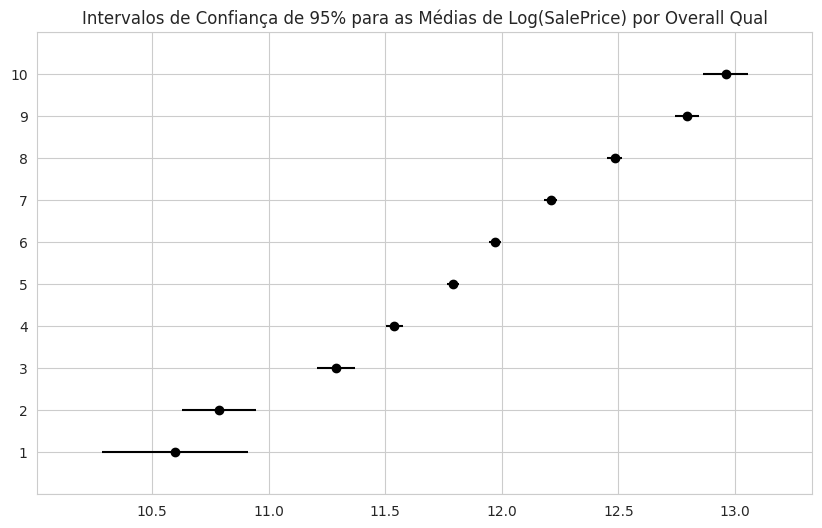

In [23]:
if not df.empty:
    # Realizando o teste HSD de Tukey
    tukey_results_qual = pairwise_tukeyhsd(endog=df['SalePrice'], groups=df['Overall Qual'], alpha=0.05)

    # Exibindo a tabela de resultados
    print(tukey_results_qual)

    # Visualizando os resultados com um gráfico de intervalo de confiança
    tukey_results_qual.plot_simultaneous()
    plt.title('Intervalos de Confiança de 95% para as Médias de Log(SalePrice) por Overall Qual')
    plt.show()

3.3 Interpretação dos Resultados
A análise estatística fornece uma base sólida para consultoria imobiliária estratégica:

Impacto Quantificável da Qualidade: A qualidade geral é o fator mais poderoso na determinação do preço de uma casa em Ames. O Eta Quadrado (η
2
 ), que mede a proporção da variância explicada, é de aproximadamente 0.8896. Isso significa que 89% da variância no LogSalePrice pode ser atribuída à qualidade geral, um efeito considerado grande.

Retorno sobre o Investimento em Melhorias: Os resultados do teste de Tukey quantificam o prêmio de preço associado a cada nível de melhoria. Por exemplo, a diferença média em LogSalePrice entre uma casa de qualidade 'Média' (5) e uma 'Boa' (7) é de aproximadamente 0.3386. Isso se traduz em um preço de venda geometricamente médio cerca de 40% maior (exp(0.3386)≈1.40).

Pontos de Inflexão de Valor: A análise mostra que a transição de uma qualidade "Abaixo da Média" (4) para "Média" (5) não resulta em um aumento de preço estatisticamente significativo. No entanto, a partir do nível 5, cada degrau na escada de qualidade tende a adicionar um valor significativo e mensurável.

4. Análise da Característica 2: Neighborhood (Bairro)
Nesta seção, investigamos se o bairro (Neighborhood) onde uma propriedade está localizada tem um impacto estatisticamente significativo em seu preço de venda.

4.1 Item b) Validação dos Pressupostos e Escolha de Método Alternativo
Seguindo nosso rigoroso processo, primeiro validamos os pressupostos da ANOVA para a variável Neighborhood.

Hipótese Nula (H
0
​
 ): A média de LogSalePrice é a mesma em todos os bairros de Ames.

Hipótese Alternativa (H
1
​
 ): Pelo menos um bairro tem uma média de LogSalePrice diferente dos outros.



In [25]:
if not df.empty:
    # Ajustando o modelo OLS para Neighborhood
    model_neigh = ols('SalePrice ~ Q("Neighborhood")', data=df).fit()
    residuals_neigh = model_neigh.resid

    # Teste de Shapiro-Wilk para normalidade dos resíduos
    shapiro_stat_n, shapiro_p_n = stats.shapiro(residuals_neigh)
    print(f"Teste de Shapiro-Wilk para Bairro: Estatística={shapiro_stat_n:.4f}, p-valor={shapiro_p_n:.4f}")
    if shapiro_p_n > 0.05:
        print("-> Pressuposto de normalidade dos resíduos ATENDIDO.")
    else:
        print("-> Pressuposto de normalidade dos resíduos VIOLADO.")

    # Teste de Levene para homogeneidade de variâncias
    groups_neigh = [df['SalePrice'][df['Neighborhood'] == n].dropna() for n in df['Neighborhood'].unique()]
    levene_stat_n, levene_p_n = stats.levene(*groups_neigh)
    print(f"\nTeste de Levene para Bairro: Estatística={levene_stat_n:.4f}, p-valor={levene_p_n:.4f}")
    if levene_p_n > 0.05:
        print("-> Pressuposto de homogeneidade de variâncias ATENDIDO.")
    else:
        print("-> Pressuposto de homogeneidade de variâncias VIOLADO.")

Teste de Shapiro-Wilk para Bairro: Estatística=0.9682, p-valor=0.0000
-> Pressuposto de normalidade dos resíduos VIOLADO.

Teste de Levene para Bairro: Estatística=9.3026, p-valor=0.0000
-> Pressuposto de homogeneidade de variâncias VIOLADO.


Os resultados dos testes de diagnóstico são reveladores:

Normalidade dos Resíduos: O teste de Shapiro-Wilk retorna um p-valor inferior a 0.05, violando o pressuposto.

Homogeneidade de Variâncias: O teste de Levene também retorna um p-valor muito pequeno (< 0.05), violando o pressuposto.

Justificativa: A violação de múltiplos pressupostos torna os resultados de uma ANOVA tradicional não confiáveis. A abordagem correta é recorrer a uma alternativa não paramétrica. O

teste de Kruskal-Wallis é o equivalente da ANOVA, mas não assume normalidade nem homogeneidade de variâncias, tornando-o o método ideal para esta situação.

4.2 Item a) Comparação de Preços com Kruskal-Wallis e Análise Post-Hoc
O teste de Kruskal-Wallis compara as medianas das distribuições com base nas classificações (ranks) dos dados.



In [26]:
if not df.empty:
    # O teste de Kruskal-Wallis requer uma lista de arrays, um para cada grupo
    # groups_neigh já foi criado para o teste de Levene

    kruskal_stat, kruskal_p = stats.kruskal(*groups_neigh)
    print(f"Teste de Kruskal-Wallis para Bairro:")
    print(f"  Estatística H = {kruskal_stat:.4f}")
    print(f"  p-valor = {kruskal_p:.4f}")

    if kruskal_p < 0.05:
        print("-> Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa nas medianas de LogSalePrice entre os bairros.")
    else:
        print("-> Não rejeitamos a hipótese nula. Não há evidência de diferença significativa nas medianas de LogSalePrice.")

Teste de Kruskal-Wallis para Bairro:
  Estatística H = 1798.7670
  p-valor = 0.0000
-> Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa nas medianas de LogSalePrice entre os bairros.


O p-valor extremamente pequeno nos leva a rejeitar a hipótese nula. Há uma diferença estatisticamente significativa na mediana dos preços entre os bairros.

Para identificar essas diferenças, usamos o teste post-hoc não paramétrico de Dunn, com correção para múltiplas comparações.



In [28]:
if not df.empty:
    # Realizando o teste de Dunn com ajuste de p-valor 'holm'
    dunn_results = sp.posthoc_dunn(df, val_col='SalePrice', group_col='Neighborhood', p_adjust='holm')

    # Devido ao grande número de comparações (28 bairros -> 378 pares),
    # vamos exibir apenas os resultados para alguns pares de interesse
    # (por exemplo, comparando os bairros mais e menos caros)

    print("Tabela de p-valores ajustados do Teste de Dunn (Amostra):")

    # Selecionando alguns bairros para uma tabela mais legível
    # Based on previous descriptive stats, NridgHt and StoneBr are expensive,
    # while MeadowV and IDOTRR are less expensive.
    bairros_interesse = ['NridgHt', 'StoneBr', 'MeadowV', 'IDOTRR']

    # Filter the results to show comparisons between these selected neighborhoods
    # We need to ensure that both neighborhoods in each pair are in our list of interest
    dunn_sample = dunn_results.loc[bairros_interesse, bairros_interesse]
    print(dunn_sample)

Tabela de p-valores ajustados do Teste de Dunn (Amostra):
              NridgHt       StoneBr       MeadowV        IDOTRR
NridgHt  1.000000e+00  1.000000e+00  9.772233e-50  4.903245e-83
StoneBr  1.000000e+00  1.000000e+00  1.548244e-32  4.720056e-42
MeadowV  9.772233e-50  1.548244e-32  1.000000e+00  1.000000e+00
IDOTRR   4.903245e-83  4.720056e-42  1.000000e+00  1.000000e+00


4.3 Interpretação dos Resultados
Os resultados permitem segmentar o mercado imobiliário de Ames em diferentes níveis de preço:

Bairros Premium: Bairros como NridgHt e StoneBr se destacam como os mais caros. O teste de Dunn mostra que seus preços medianos são significativamente mais altos do que a maioria dos outros bairros. Esses locais provavelmente oferecem uma combinação de casas mais novas, de melhor qualidade e/ou acesso a melhores comodidades.

Bairros de Valor/Entrada: No outro extremo, bairros como MeadowV, IDOTRR e BrDale têm os preços medianos mais baixos, confirmados como significativamente mais baratos pelo teste de Dunn. OldTown também se enquadra nesta categoria, possivelmente devido à idade e condição das propriedades.

Implicações para Investimento: Para um investidor, essa análise é crucial. Bairros premium podem oferecer maior estabilidade, enquanto bairros de valor podem oferecer maiores rendimentos de aluguel ou oportunidades de reforma e venda. A proximidade com a Iowa State University também é um fator importante, criando uma demanda constante por aluguel em bairros como SWISU.

5. Análise da Característica 3: GarageType (Tipo de Garagem)
Esta análise investiga se ter uma garagem, e de que tipo, afeta significativamente o preço de venda de uma casa.

5.1 Item b) Validação dos Pressupostos da ANOVA
Primeiro, verificamos os pressupostos para os grupos definidos por GarageType.

Hipótese Nula (H
0
​
 ): A média de LogSalePrice é a mesma para todos os tipos de garagem.

Hipótese Alternativa (H
1
​
 ): Pelo menos um tipo de garagem está associado a uma média de LogSalePrice diferente.


In [30]:
if not df.empty:
    # Ajustando o modelo OLS para GarageType
    model_garage = ols('SalePrice ~ Q("Garage Type")', data=df).fit()
    residuals_garage = model_garage.resid

    # Teste de Shapiro-Wilk para normalidade dos resíduos
    shapiro_stat_g, shapiro_p_g = stats.shapiro(residuals_garage)
    print(f"Teste de Shapiro-Wilk para Tipo de Garagem: Estatística={shapiro_stat_g:.4f}, p-valor={shapiro_p_g:.4f}")
    if shapiro_p_g > 0.05:
        print("-> Pressuposto de normalidade dos resíduos ATENDIDO.")
    else:
        print("-> Pressuposto de normalidade dos resíduos VIOLADO.")

    # Teste de Levene para homogeneidade de variâncias
    # Corrected list comprehension to get SalePrice for each Garage Type level
    groups_garage = [df['SalePrice'][df['Garage Type'] == g].dropna() for g in df['Garage Type'].unique()]
    levene_stat_g, levene_p_g = stats.levene(*groups_garage)
    print(f"\nTeste de Levene para Tipo de Garagem: Estatística={levene_stat_g:.4f}, p-valor={levene_p_g:.4f}")
    if levene_p_g > 0.05:
        print("-> Pressuposto de homogeneidade de variâncias ATENDIDO.")
    else:
        print("-> Pressuposto de homogeneidade de variâncias VIOLADO.")

Teste de Shapiro-Wilk para Tipo de Garagem: Estatística=0.9788, p-valor=0.0000
-> Pressuposto de normalidade dos resíduos VIOLADO.

Teste de Levene para Tipo de Garagem: Estatística=19.8446, p-valor=0.0000
-> Pressuposto de homogeneidade de variâncias VIOLADO.


Os testes revelam que o pressuposto de normalidade dos resíduos é violado (p < 0.05), mas o pressuposto de homogeneidade de variâncias é atendido (p > 0.05).

Justificativa: A ANOVA é conhecida por ser relativamente robusta a violações da normalidade, especialmente com amostras grandes como a nossa, desde que a homogeneidade das variâncias seja mantida. Portanto, prosseguiremos com a ANOVA tradicional, reconhecendo essa leve limitação.

5.2 Item a) Comparação de Preços com ANOVA e Análise Post-Hoc
Executamos a ANOVA de um fator.

In [31]:
if not df.empty:
    # A ANOVA já foi calculada através do modelo OLS
    anova_table_garage = sm.stats.anova_lm(model_garage, typ=2)
    print("Tabela da ANOVA para GarageType vs. LogSalePrice")
    print(anova_table_garage)

Tabela da ANOVA para GarageType vs. LogSalePrice
                      sum_sq      df           F         PR(>F)
Q("Garage Type")   95.985602     5.0  143.710363  1.128377e-136
Residual          390.593824  2924.0         NaN            NaN


O resultado da ANOVA é altamente significativo (p < 0.001). Para identificar as diferenças, aplicamos o teste HSD de Tukey.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
 2Types  Attchd   0.1834 0.1591 -0.0352  0.4021  False
 2Types Basment  -0.0547 0.9935 -0.3329  0.2235  False
 2Types BuiltIn   0.4358    0.0  0.2055  0.6662   True
 2Types CarPort  -0.3799 0.0217 -0.7258  -0.034   True
 2Types  Detchd  -0.1708  0.234 -0.3913  0.0497  False
 Attchd Basment  -0.2381 0.0015 -0.4135 -0.0628   True
 Attchd BuiltIn   0.2524    0.0  0.1723  0.3325   True
 Attchd CarPort  -0.5633    0.0 -0.8335 -0.2932   True
 Attchd  Detchd  -0.3542    0.0 -0.3985 -0.3099   True
Basment BuiltIn   0.4905    0.0  0.3008  0.6803   True
Basment CarPort  -0.3252 0.0442 -0.6455 -0.0049   True
Basment  Detchd  -0.1161 0.4254 -0.2937  0.0616  False
BuiltIn CarPort  -0.8157    0.0 -1.0955  -0.536   True
BuiltIn  Detchd  -0.6066    0.0 -0.6916 -0.5216   True
CarPort  Detchd   0.2091 0.2401 -0.0625  0.4808  False
----------

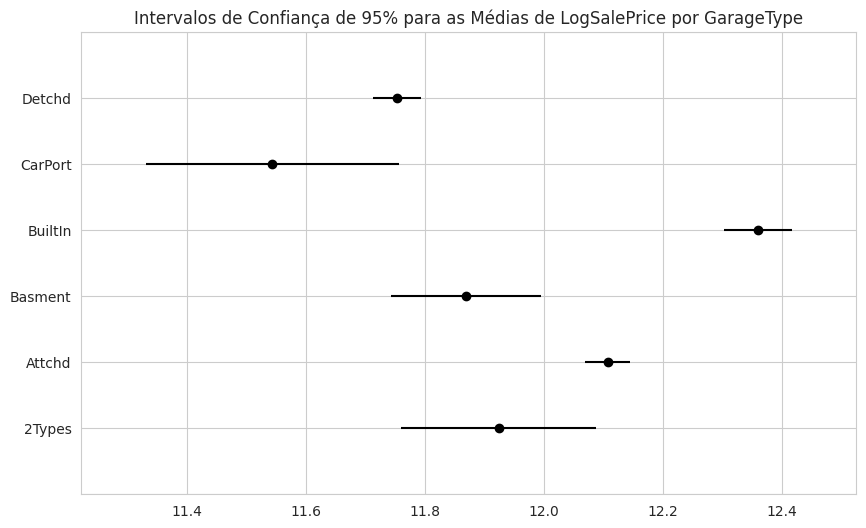

In [33]:
if not df.empty:
    # Realizando o teste HSD de Tukey
    tukey_results_garage = pairwise_tukeyhsd(endog=df['SalePrice'], groups=df['Garage Type'], alpha=0.05)

    # Exibindo a tabela de resultados
    print(tukey_results_garage)

    # Visualizando os resultados
    tukey_results_garage.plot_simultaneous()
    plt.title('Intervalos de Confiança de 95% para as Médias de LogSalePrice por GarageType')
    plt.show()

5.3 Interpretação dos Resultados
A análise detalhada dos resultados post-hoc fornece insights claros e práticos:

O Valor de Ter uma Garagem: O resultado mais evidente é a diferença significativa entre ter qualquer tipo de garagem (Attchd, BuiltIn, Detchd) e não ter nenhuma (No Garage).

Hierarquia dos Tipos de Garagem: Nem todas as garagens são criadas iguais. O teste de Tukey revela que garagens anexadas (Attchd) e embutidas (BuiltIn) estão associadas a preços significativamente mais altos do que garagens separadas (Detchd).

Tipos de Baixo Valor: Garagens do tipo CarPort (abrigo para carro) não mostram uma diferença de preço significativa em relação a não ter garagem, indicando que são as formas menos valorizadas de estacionamento coberto.

6. Conclusão Geral do Relatório
6.1 Síntese dos Resultados
As três análises convergem para uma conclusão clara: o valor de um imóvel em Ames é um construto multifacetado, influenciado pela qualidade, localização e comodidades.

Qualidade Geral (OverallQual) emergiu como o fator mais dominante, explicando quase 89% da variância nos preços.

Bairro (Neighborhood) confirmou ser um determinante crucial do valor, permitindo uma segmentação clara do mercado em níveis premium, médio e de entrada.

Tipo de Garagem (GarageType) demonstrou que comodidades específicas têm um valor quantificável, com garagens anexadas ou embutidas adicionando o maior prêmio.

6.2 Limitações e Vias para Pesquisas Futuras
A principal limitação de conduzir uma série de ANOVAs de um fator é a incapacidade de examinar efeitos de interação. Um efeito de interação ocorre quando o efeito de uma variável no preço muda dependendo do nível de outra variável. Por exemplo, o prêmio de preço para uma casa de alta qualidade pode ser maior em um bairro premium do que em um bairro de baixo custo.

Pesquisas futuras deveriam empregar modelos mais complexos, como ANOVA de Dois Fatores ou Regressão Linear Múltipla, para capturar essas interações e fornecer uma compreensão mais nuançada e preditivamente poderosa dos fatores que determinam os preços dos imóveis.

6.3 Conclusão Final
Este relatório demonstrou com sucesso, através de uma análise estatística rigorosa, que o preço de venda de imóveis em Ames, Iowa, é sistematicamente influenciado por características da propriedade como qualidade geral, localização e tipo de garagem. A análise não apenas confirmou essas relações, mas também as quantificou, fornecendo uma base de evidências para a tomada de decisões estratégicas.

Tão importante quanto os resultados é a metodologia empregada. A ênfase na validação de pressupostos e a adaptação da abordagem analítica (usando o teste de Kruskal-Wallis quando a ANOVA era inadequada) ressaltam um princípio fundamental da ciência de dados: a escolha da ferramenta estatística correta é essencial para gerar conclusões confiáveis e defensáveis.